In [82]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sksurv.preprocessing import OneHotEncoder

In [83]:
df = pd.read_csv('clean_data.csv', sep=',')
df = df.sample(frac=1).reset_index(drop=True)
df = df[df.Job_Function__IA__Host_All_Other != 'Operations']
df['delta'] = df['delta'].astype(bool)

In [84]:
# generate 2d classification dataset
#X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
data_x = df.drop(["delta", "Termination_Reason"], axis=1)
for c in data_x.columns:
    if data_x[c].dtype == object:
        print(c)
        data_x[c] = data_x[c].astype('category')
data_x = data_x.drop(["Job_Sub_Function__IA__Host_All_O"], axis=1)

Job_Sub_Function__IA__Host_All_O
Job_Function__IA__Host_All_Other
Rehire_YN
Employee_Rating_1_W
Employee_Rating_1_H
Employee_Rating_2_W
Employee_Rating_2_H
Employee_Rating_3_W
Employee_Rating_3_H
Manager_Rating_1_W
Manager_Rating_1_H
Manager_Rating_2_W
Manager_Rating_2_H
Manager_Rating_3_W
Manager_Rating_3_H


In [85]:
data_x['Rehire_YN'] = data_x['Rehire_YN'].cat.codes
data_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4668 entries, 0 to 7453
Data columns (total 36 columns):
Unnamed: 0                          4668 non-null int64
Compensation_Range___Midpoint       4668 non-null int64
Total_Base_Pay___Local              4668 non-null float64
Length_of_Service_in_Years_inclu    4668 non-null float64
Job_Function__IA__Host_All_Other    4668 non-null category
Promotion                           4668 non-null int64
Demotion                            4668 non-null int64
Lateral                             4668 non-null int64
Cross_Move                          4668 non-null int64
Trainings_Completed                 4668 non-null float64
Mgr_Change                          4668 non-null int64
SkipLevel_Mgr_Change                4668 non-null int64
Rehire_YN                           4668 non-null int8
_018_Planned_as_a___of_Bonus_Tar    4668 non-null float64
_017_Planned_as_a___of_Bonus_Tar    4668 non-null float64
_016_Planned_as_a___of_Bonus_Tar    4668 

In [86]:
data_x_numeric = OneHotEncoder().fit_transform(data_x)
data_x_numeric.head()

,Unnamed: 0,Compensation_Range___Midpoint,Total_Base_Pay___Local,Length_of_Service_in_Years_inclu,Job_Function__IA__Host_All_Other=Facilities,Job_Function__IA__Host_All_Other=Finance,Job_Function__IA__Host_All_Other=General Administration,Job_Function__IA__Host_All_Other=General Management,Job_Function__IA__Host_All_Other=Human Resources,Job_Function__IA__Host_All_Other=Info Technology,...,Manager_Rating_2_H=4,Manager_Rating_2_H=Missing,Manager_Rating_3_W=2,Manager_Rating_3_W=3,Manager_Rating_3_W=4,Manager_Rating_3_W=Missing,Manager_Rating_3_H=3,Manager_Rating_3_H=4,Manager_Rating_3_H=Missing,Job_Function_encoded
0,1750,44000,62418.97,5.39,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
2,218,35000,33592.50,6.55,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
4,1627,108000,116163.44,5.64,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2
5,3393,81310,74081.33,1.72,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2
6,2233,108000,96000.00,0.15,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2


In [87]:
data_x_numeric = data_x_numeric.drop(["Unnamed: 0"], axis=1)

In [88]:
for c in data_x_numeric.columns:
    if 'Missing' in c:
        print(c)
        data_x_numeric = data_x_numeric.drop(c, axis=1)

Employee_Rating_1_W=Missing
Employee_Rating_1_H=Missing
Employee_Rating_2_W=Missing
Employee_Rating_2_H=Missing
Employee_Rating_3_W=Missing
Employee_Rating_3_H=Missing
Manager_Rating_1_W=Missing
Manager_Rating_1_H=Missing
Manager_Rating_2_W=Missing
Manager_Rating_2_H=Missing
Manager_Rating_3_W=Missing
Manager_Rating_3_H=Missing


In [89]:
data_x_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4668 entries, 0 to 7453
Data columns (total 70 columns):
Compensation_Range___Midpoint                              4668 non-null int64
Total_Base_Pay___Local                                     4668 non-null float64
Length_of_Service_in_Years_inclu                           4668 non-null float64
Job_Function__IA__Host_All_Other=Facilities                4668 non-null float64
Job_Function__IA__Host_All_Other=Finance                   4668 non-null float64
Job_Function__IA__Host_All_Other=General Administration    4668 non-null float64
Job_Function__IA__Host_All_Other=General Management        4668 non-null float64
Job_Function__IA__Host_All_Other=Human Resources           4668 non-null float64
Job_Function__IA__Host_All_Other=Info Technology           4668 non-null float64
Job_Function__IA__Host_All_Other=Legal                     4668 non-null float64
Job_Function__IA__Host_All_Other=Marketing                 4668 non-null float64
Job_

In [90]:
data_y = pd.Series()
data_y['Status'] = df['delta']

In [127]:
# fit final model
model = LogisticRegression(max_iter=500, solver='lbfgs')
model.fit(data_x_numeric[:4000], data_y.Status[:4000])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [92]:
ynew = model.predict_proba(data_x_numeric[4000:])

In [93]:
data_x_numeric.values[4000]

array([ 2.37000000e+05,  2.51623440e+05,  4.48000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.05885300e+00,  1.24945900e+00,  4.12594000e-01,
       -9.99000000e+02,  6.17022785e-02,  1.06170228e+00,  1.70110510e+00,
       -9.99000000e+02, -9.99000000e+02, -9.99000000e+02,  0.00000000e+00,
        1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        0.00000000e+00,  

In [94]:
# define one new instance
Xnew = [data_x_numeric.values[4000]]

In [95]:
# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0][1], ynew[0]))

X=251623.44, Predicted=False


In [96]:
ynew = model.predict_proba(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0][1], ynew[0]))

X=251623.44, Predicted=[0.8796935 0.1203065]


In [97]:
data_y.Status.values

array([False, False, False, ..., False, False, False])

In [98]:
Xnew = data_x_numeric.values[4000:]
# make a prediction
ynew = model.predict_proba(Xnew)
# show the inputs and predicted probabilities
for i in range(len(Xnew)):
    if data_y.Status.values[4000+i]:
        print("X=%s, Predicted=%s, Actual=%s" % (Xnew[i][1], ynew[i], data_y.Status.values[4000+i]))

X=143378.52, Predicted=[0.87901364 0.12098636], Actual=True
X=222678.52, Predicted=[0.86136076 0.13863924], Actual=True
X=115078.3, Predicted=[0.86417382 0.13582618], Actual=True
X=144098.6, Predicted=[0.91783775 0.08216225], Actual=True
X=115179.0, Predicted=[0.85359073 0.14640927], Actual=True
X=45220.16, Predicted=[0.80887998 0.19112002], Actual=True
X=16927.71, Predicted=[7.05419111e-06 9.99992946e-01], Actual=True
X=19414.26, Predicted=[0.71833956 0.28166044], Actual=True
X=94915.74, Predicted=[0.89497334 0.10502666], Actual=True
X=50222.56, Predicted=[0.89788633 0.10211367], Actual=True
X=57028.0, Predicted=[0.87365059 0.12634941], Actual=True
X=356178.52, Predicted=[0.95553878 0.04446122], Actual=True
X=467428.96, Predicted=[0.964977 0.035023], Actual=True
X=21113.5, Predicted=[7.21908736e-06 9.99992781e-01], Actual=True
X=39056.85, Predicted=[0.73977934 0.26022066], Actual=True
X=81455.66, Predicted=[0.75919702 0.24080298], Actual=True
X=56180.0, Predicted=[0.87313319 0.1268668

In [99]:
import matplotlib.pyplot as plt

In [130]:
active = [x[1] for i,x in enumerate(ynew) if not data_y.Status.values[4000+i]]
resigned = [x[1] for i,x in enumerate(ynew) if data_y.Status.values[4000+i]]

Text(0.5, 0, 'Resignation Probability')

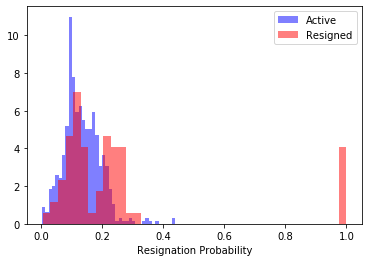

In [133]:
fig, ax = plt.subplots()
ax.hist(active, 40, density=1, label='Active', alpha=0.5, color="blue")
ax.hist(resigned, 40, density=1, label='Resigned', alpha=0.5, color="red")
ax.legend(loc='best')
plt.xlabel("Resignation Probability")

In [102]:
import sklearn
from sklearn import tree

In [103]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.20.3.


In [104]:
clf = tree.DecisionTreeClassifier()

In [105]:
clf = clf.fit(data_x_numeric[:4000], data_y.Status[:4000])

In [106]:
!pip install -q graphviz
import graphviz

In [107]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/jchaves6/Documents/graphviz-2.38/release/bin/'

In [108]:
columns=list(data_x_numeric.columns)
dot_data = tree.export_graphviz(clf,out_file=None,feature_names=columns,class_names=True)
graph = graphviz.Source(dot_data)
graph.render("image",view=True)

'image.pdf'

In [109]:
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus

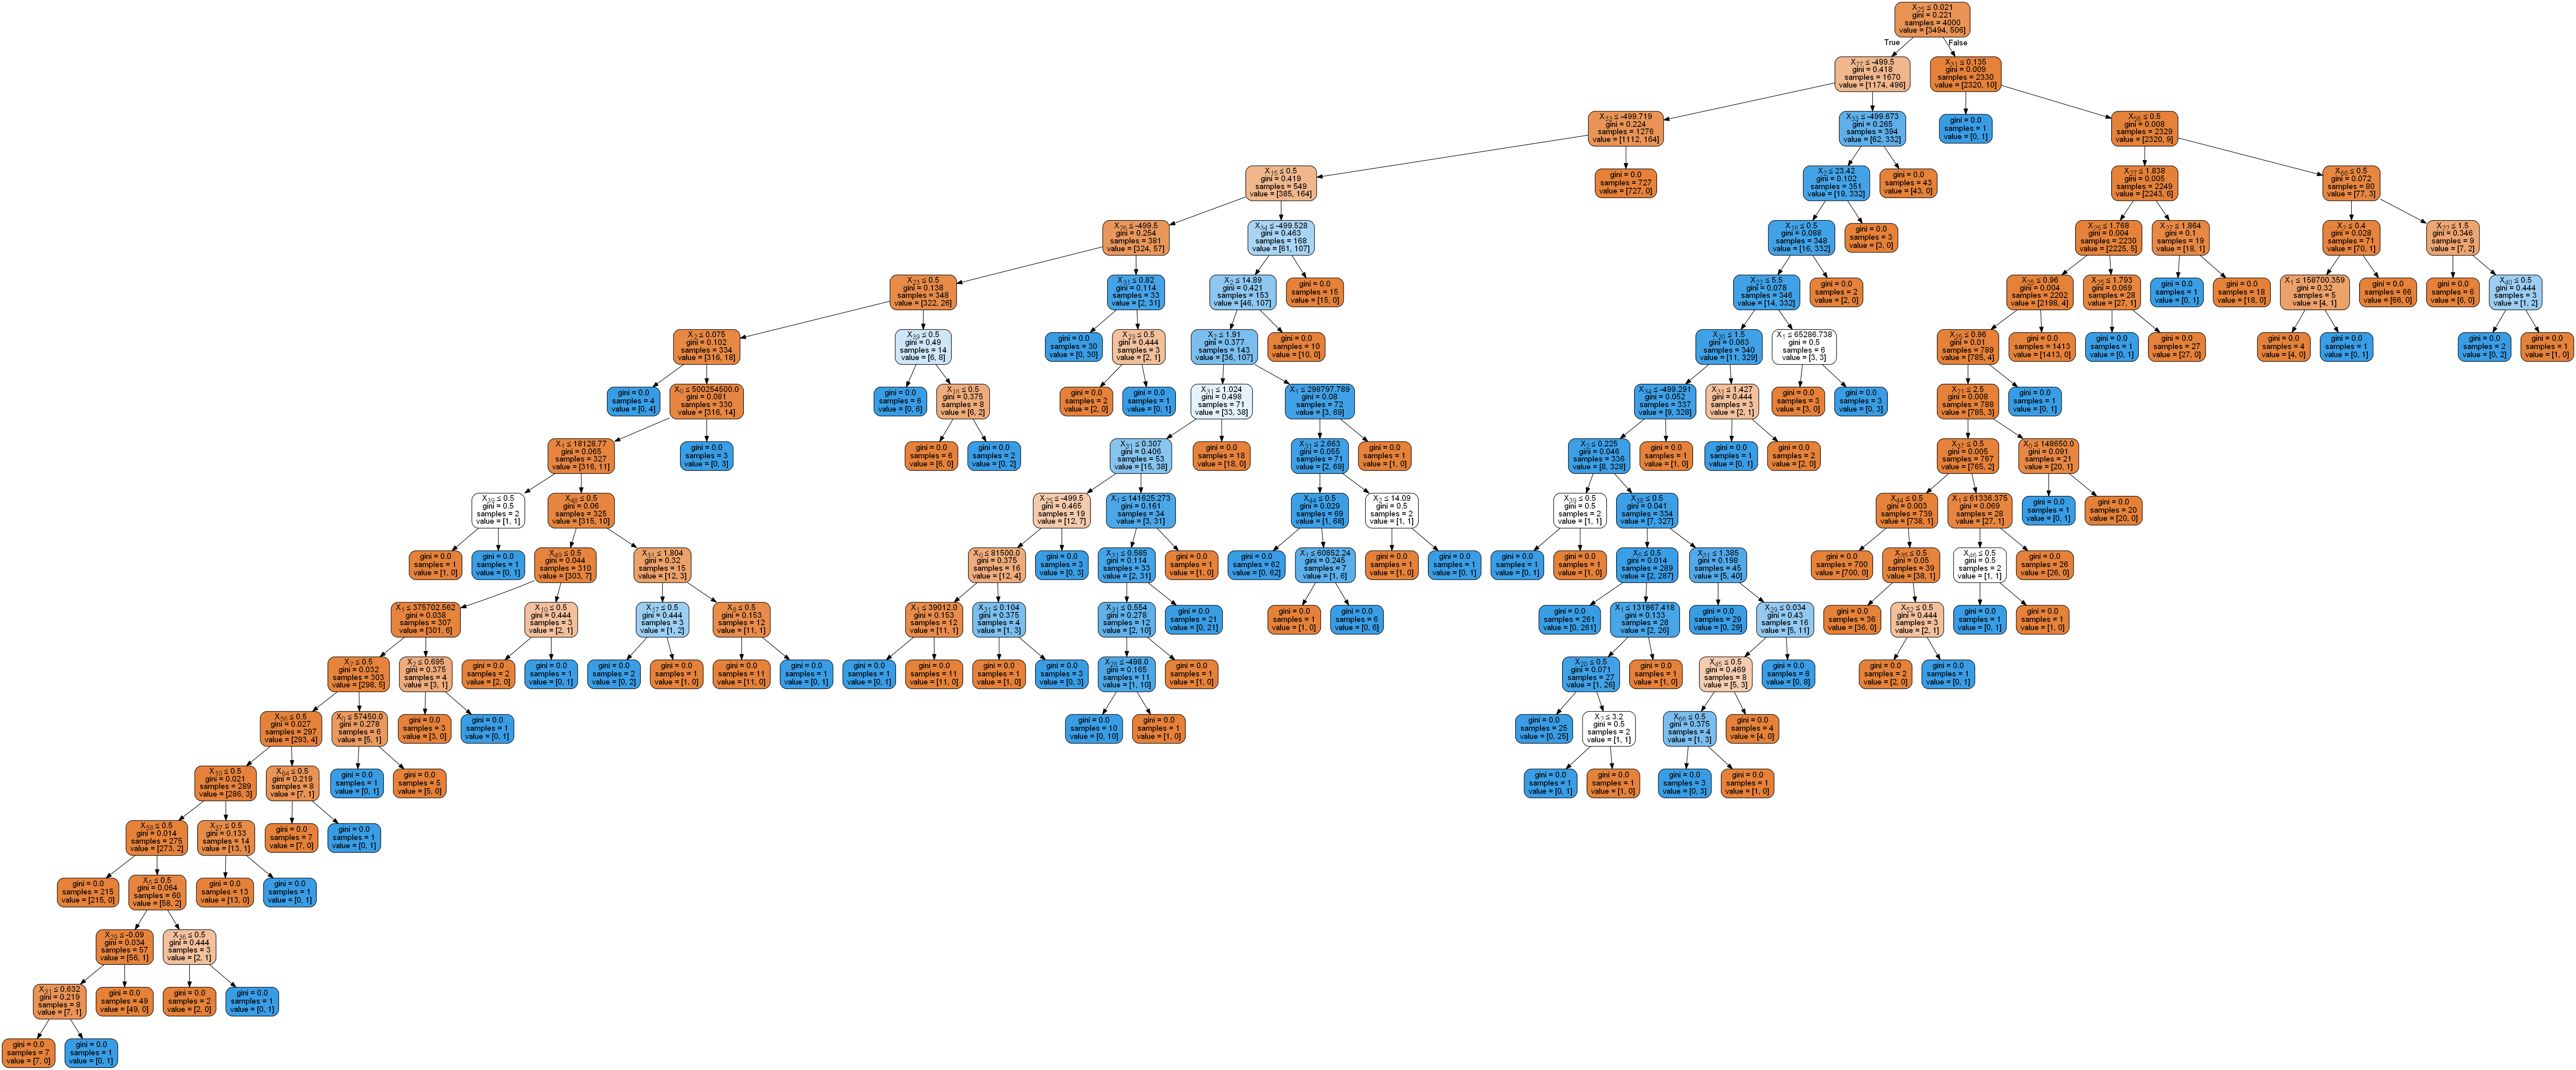

In [110]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [111]:
ynew_tree = clf.predict_proba(Xnew)
ynew_tree

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [112]:
active = [x[1] for i,x in enumerate(ynew_tree) if not data_y.Status.values[4000+i]]
resigned = [x[1] for i,x in enumerate(ynew_tree) if data_y.Status.values[4000+i]]

(array([ 3.47826087,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , 36.52173913]),
 array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
        0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
        0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
        0.9  , 0.925, 0.95 , 0.975, 1.   ]),
 <a list of 40 Patch objects>)

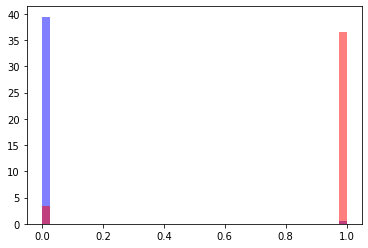

In [113]:
fig, ax = plt.subplots()
ax.hist(active, 40, density=1, label='Resigned', alpha=0.5, color="blue")
ax.hist(resigned, 40, density=1, label='Resigned', alpha=0.5, color="red")

In [114]:
from sklearn.neural_network import MLPClassifier

In [115]:
clf2 = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(10, 2), random_state=1, verbose=True)

In [116]:
clf2.fit(data_x_numeric[:4000], data_y.Status[:4000])

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [117]:
[coef.shape for coef in clf2.coefs_]

[(70, 10), (10, 2), (2, 1)]

In [118]:
ynew_ml = clf2.predict_proba(data_x_numeric[4000:])

In [119]:
Xnew = data_x_numeric.values[4000:]
# make a prediction
ynew_ml = clf2.predict_proba(Xnew)
# show the inputs and predicted probabilities
for i in range(len(Xnew)):
    if data_y.Status.values[4000+i]:
        print("X=%s, Predicted=%s, Actual=%s" % (Xnew[i][1], ynew_ml[i], data_y.Status.values[4000+i]))

X=143378.52, Predicted=[1. 0.], Actual=True
X=222678.52, Predicted=[1. 0.], Actual=True
X=115078.3, Predicted=[1.00000000e+000 1.28459027e-290], Actual=True
X=144098.6, Predicted=[1. 0.], Actual=True
X=115179.0, Predicted=[1. 0.], Actual=True
X=45220.16, Predicted=[1. 0.], Actual=True
X=16927.71, Predicted=[1. 0.], Actual=True
X=19414.26, Predicted=[1. 0.], Actual=True
X=94915.74, Predicted=[1. 0.], Actual=True
X=50222.56, Predicted=[1. 0.], Actual=True
X=57028.0, Predicted=[1. 0.], Actual=True
X=356178.52, Predicted=[1. 0.], Actual=True
X=467428.96, Predicted=[1. 0.], Actual=True
X=21113.5, Predicted=[1. 0.], Actual=True
X=39056.85, Predicted=[1.00000000e+000 1.42644114e-239], Actual=True
X=81455.66, Predicted=[1. 0.], Actual=True
X=56180.0, Predicted=[1. 0.], Actual=True
X=266229.36, Predicted=[1. 0.], Actual=True
X=38064.05, Predicted=[1. 0.], Actual=True
X=37070.88, Predicted=[1. 0.], Actual=True
X=113709.96, Predicted=[1. 0.], Actual=True
X=87313.69, Predicted=[1. 0.], Actual=True

In [120]:
active = [x[1] for i,x in enumerate(ynew_ml) if not data_y.Status.values[4000+i]]
resigned = [x[1] for i,x in enumerate(ynew_ml) if data_y.Status.values[4000+i]]

(array([2.11262278e+223, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 3.10679820e+221]),
 array([0.00000000e+000, 4.66485194e-224, 9.32970388e-224, 1.39945558e-223,
        1.86594078e-223, 2.33242597e-223, 2.79891117e-223, 3.26539636e-223,
        3.73188155e-223, 4.19836675e-223, 4.66485194e-223, 5.13133714e-223,
        5.

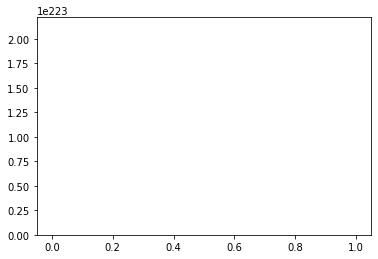

In [121]:
fig, ax = plt.subplots()
ax.hist(active, 40, density=1, label='Resigned', alpha=0.5, color="blue")
ax.hist(resigned, 40, density=1, label='Resigned', alpha=0.5, color="red")

In [122]:
data_x_numeric.to_pickle("./data_x_numeric.pkl")

In [123]:
data_y.to_pickle("./data_y.pkl")

In [124]:
data_x_numeric.head()

,Compensation_Range___Midpoint,Total_Base_Pay___Local,Length_of_Service_in_Years_inclu,Job_Function__IA__Host_All_Other=Facilities,Job_Function__IA__Host_All_Other=Finance,Job_Function__IA__Host_All_Other=General Administration,Job_Function__IA__Host_All_Other=General Management,Job_Function__IA__Host_All_Other=Human Resources,Job_Function__IA__Host_All_Other=Info Technology,Job_Function__IA__Host_All_Other=Legal,...,Manager_Rating_2_W=3,Manager_Rating_2_W=4,Manager_Rating_2_H=3,Manager_Rating_2_H=4,Manager_Rating_3_W=2,Manager_Rating_3_W=3,Manager_Rating_3_W=4,Manager_Rating_3_H=3,Manager_Rating_3_H=4,Job_Function_encoded
0,44000,62418.97,5.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2
2,35000,33592.50,6.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
4,108000,116163.44,5.64,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2
5,81310,74081.33,1.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2
6,108000,96000.00,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [128]:
data_x_numeric.shape[0]

4668